In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [318]:
df = pd.read_csv("data/dataset_fd_Sp_no-Mos.csv", index_col=0)

In [319]:
agg_df = df.groupby(["region", "week"]).agg(infections=("infections", "mean"),
                                            unemployed=("unemployed", "sum"),
                                            population=("population", "mean"),
                                            federal_district=("federal_district", lambda x: x.iloc[0])).reset_index().set_index("region")

In [320]:
agg_df = agg_df.groupby("federal_district").agg({"infections":"sum", "unemployed":"sum", "population":"sum", "federal_district":lambda x: x.iloc[0]})

In [321]:
agg_df

,infections,unemployed,population,federal_district
federal_district,,,,
ДФО,97589.0,248153,243567450.0,ДФО
ПФО,204153.0,823752,878630490.0,ПФО
СЗФО,194088.0,359956,418136430.0,СЗФО
СКФО,70617.0,743087,297927990.0,СКФО
СФО,150880.0,540556,513551610.0,СФО
УФО,116630.0,400474,370822560.0,УФО
ЦФО,266823.0,640022,802664310.0,ЦФО
ЮФО,101956.0,590845,493982520.0,ЮФО


In [322]:
agg_df["procent_unemployed"] = agg_df.unemployed / agg_df.population

In [323]:
agg_df["procent_infected"] = agg_df.infections / agg_df.population

In [324]:
agg_df

,infections,unemployed,population,federal_district,procent_unemployed,procent_infected
federal_district,,,,,,
ДФО,97589.0,248153,243567450.0,ДФО,0.001019,0.000401
ПФО,204153.0,823752,878630490.0,ПФО,0.000938,0.000232
СЗФО,194088.0,359956,418136430.0,СЗФО,0.000861,0.000464
СКФО,70617.0,743087,297927990.0,СКФО,0.002494,0.000237
СФО,150880.0,540556,513551610.0,СФО,0.001053,0.000294
УФО,116630.0,400474,370822560.0,УФО,0.001080,0.000315
ЦФО,266823.0,640022,802664310.0,ЦФО,0.000797,0.000332
ЮФО,101956.0,590845,493982520.0,ЮФО,0.001196,0.000206


In [325]:
agg_df.drop("federal_district", axis=1, inplace=True)
one = agg_df[["procent_infected"]].reset_index().rename({"procent_infected":"value"}, axis=1)
two = agg_df[["procent_unemployed"]].reset_index().rename({"procent_unemployed":"value"}, axis=1)

In [326]:
one["kind"] = "Кол-во выявленных случаев заболевания (доля населения)"
two["kind"] = "Кол-во поданных заявок на пособие по безработице (доля населения)"

In [327]:
tmp = one.append(two)

C:\Users\iltya\AppData\Local\Temp\ipykernel_21300\3706551119.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp = one.append(two)


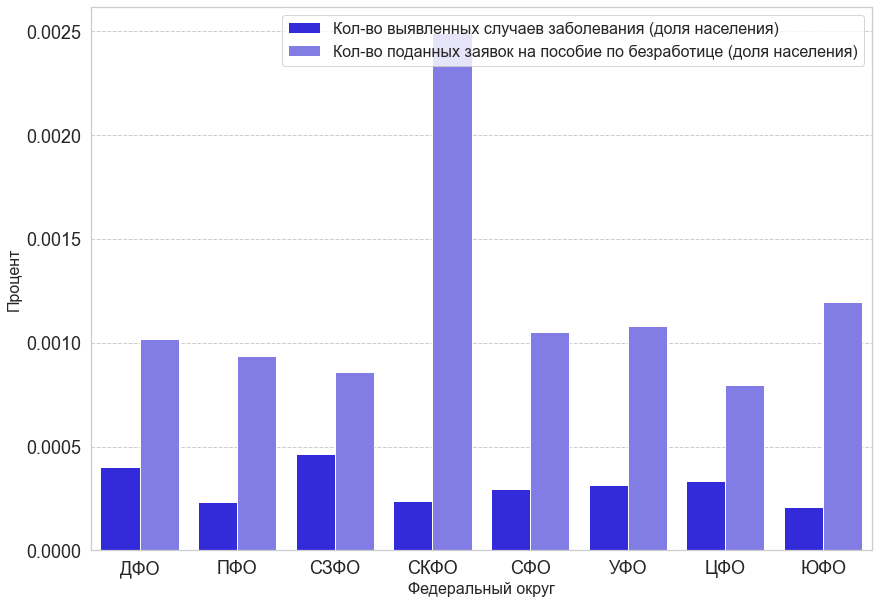

In [328]:
color1 = "#190DF6"
color2 = "#736cf5"

# Создайте градиент от color1 к color2
custom_palette = sns.color_palette([color1, color2], as_cmap=True)

# Используйте вашу палитру в barplot

plt.figure(figsize=(14, 10))
sns.set(rc={'font.size': 12, 'axes.facecolor': '#FFFFFF'})
sns.set_style("whitegrid", {'grid.color': '.8', 'grid.linestyle': '--'})
sns.set_palette(custom_palette)
ax = sns.barplot(data=tmp, x="federal_district", y="value", hue="kind",  )

ax.set_xlabel('Федеральный округ', fontsize=16)  # Set font size for x-axis label
ax.set_ylabel('Процент', fontsize=16)  # Set font size for y-axis label

ax.legend(fontsize='16', title_fontsize='14')

ax.tick_params(axis='both', labelsize=18)   # Set font size for tick labels

In [271]:
df = pd.read_csv("data/dataset_1.csv")
df_region_metric = pd.read_csv("data/dataset_1_regions_merged.csv", index_col=0).set_index("region")

In [272]:
columns_to_drop = ['healed', 'infections', 'unemployed', 'deaths', 'population']
df_region_metric.drop(columns_to_drop, axis=1, inplace=True)

In [273]:
df = pd.merge(df, df_region_metric, left_on="region", right_index=True)

In [274]:
df

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,procent_deaths,fin_blago,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp
0,2020-04-06,Адыгея,"Строительство, ремонт, стройматериалы, недвижи...",19,18,0,3,12,19,19,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
1,2020-04-06,Адыгея,Машиностроение,2,1,0,0,1,1,2,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
2,2020-04-06,Адыгея,Юриспруденция,13,6,0,2,11,13,13,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
3,2020-04-06,Адыгея,Пищевая промышленность,9,2,1,2,6,9,9,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
4,2020-04-06,Адыгея,"Государственная служба, некоммерческие организ...",17,8,0,3,14,17,17,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75089,2020-10-26,Ярославская,"Услуги населению, сервисное обслуживание",2,0,1,2,2,2,2,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
75090,2020-10-26,Ярославская,"Работы, не требующие квалификации",33,20,2,9,14,20,32,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
75091,2020-10-26,Ярославская,Электроэнергетика,1,1,0,0,1,1,1,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
75092,2020-10-26,Ярославская,"Химическая, нефтехимическая, топливная промышл...",1,1,0,0,0,0,1,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6


### Гипотеза
Количество заявок на пособие по безработице взаимосвязано с эпидемиологический обстановкой в регионе в период пандемии COVID19

## проверим наличие зависимостей на уровне регион-неделя

In [275]:
# agg_df = df.groupby(["region", "week"]).agg(infections=("infections", "mean"),
#                                             unemployed=("unemployed", "sum"),
#                                             population=("population", "mean")).reset_index()
#
# # отнормируем кол-во заявок на пособие по безработице и кол-во заражений в регионе на население
# agg_df["infections"] = agg_df["infections"] / agg_df["population"]
# agg_df["unemployed"] = agg_df["unemployed"] / agg_df["population"]
#
# plt.figure(figsize=(15, 8))
# plt.yscale("log")
# plt.xscale("log")
# sns.scatterplot(data = agg_df, x="infections", y="unemployed", color=color1)
# plt.title("Зависимость кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе \n за неделю \n (обе величины отнормированы на население региона)",
#           fontsize=16
#           )
# None

посчитаем корелляцию кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе за неделю

Ярко выраженной зависимости ожидаемо нет, так как согласно механизму заболеваемость *отложенно* влияет на экономику региона

## проверим наличие зависимостей на уровне различных регионов
Оценим суммарное кол-во зарегестрированных случаев
?Будем считать что оно высоко коррелирует с реальной эпидемиологической обстановкой
Посчитаем на суммарное кол-ве поданных заявок на пособие по безработице
Посмотрим на корелляцию данных величин

In [276]:
# agg_df = df.groupby(["region", "week"]).agg(infections=("infections", "mean"),
#                                             unemployed=("unemployed", "sum"),
#                                             population=("population", "mean"),
#                                             federal_district=("federal_district", lambda x: x.iloc[0]))
#
# agg_df = agg_df.groupby("region").agg(sum_infections=("infections", "sum"),
#                              sum_unemployed=("unemployed", "sum"),
#                              population=("population", "mean"),
#                              federal_district=("federal_district", lambda x: x.iloc[0]))
#
# # отнормируем кол-во заявок на пособие по безработице и кол-во заражений в регионе на население
# agg_df["sum_infections"] = agg_df["sum_infections"] / agg_df["population"]
# agg_df["sum_unemployed"] = agg_df["sum_unemployed"] / agg_df["population"]
#
# plt.figure(figsize=(15, 8))
# plt.yscale("log")
# plt.xscale("log")
# sns.scatterplot(data = agg_df, x="sum_infections", y="sum_unemployed", hue="federal_district")
# plt.title("Зависимость кол-ва зарегестрированных заявок на безработцу от кол-ва заражений в регионе \n ЗА ВЕСЬ ПЕРИОД ПАНДЕМИИ \n (обе величины отнормированы на население региона)")
# None

In [277]:
# np.corrcoef(agg_df[["sum_infections", "sum_unemployed"]].transpose())

Значимого уровня корреляции между исследуемыми показателями не найдено

## регрессионный анализ
Чтобы проверить наличие взаимосвязи между количеством заявок на пособие по безработице и регистрируемым количеством заболеваний воспользуемся оценкой модели со случайными эффектами

предпосылки к использованию модели со случаынйми эффектами - ?
какие тесты надо дополнительно провести?

In [278]:
df["Rt"] = df.Rt.fillna(df.Rt.median())

In [279]:
df.columns

Index(['week', 'region', 'oced', 'unemployed', 'cv_gender', 'cv_birthday_2000',
       'cv_birthday_1990', 'cv_birthday_1980', 'cv_birthday_1970',
       'cv_birthday_1960', 'population', 'men', 'women', 'infections',
       'deaths', 'healed', 'tests', 'Rt', 'level', 'yandex_continuous',
       'yandex_level', 'pass', 'procent_unemployed', 'procent_infections',
       'procent_healed', 'procent_deaths', 'fin_blago', 'depo_mean',
       'depo_salary', 'income_fix', 'poverty_proc', 'ex_poverty_proc',
       'social_exp', 'growth_social_exp', 'soc_in_total_exp'],
      dtype='object')

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75094 entries, 0 to 75093
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   week                75094 non-null  object 
 1   region              75094 non-null  object 
 2   oced                75094 non-null  object 
 3   unemployed          75094 non-null  int64  
 4   cv_gender           75094 non-null  int64  
 5   cv_birthday_2000    75094 non-null  int64  
 6   cv_birthday_1990    75094 non-null  int64  
 7   cv_birthday_1980    75094 non-null  int64  
 8   cv_birthday_1970    75094 non-null  int64  
 9   cv_birthday_1960    75094 non-null  int64  
 10  population          75094 non-null  float64
 11  men                 75094 non-null  float64
 12  women               75094 non-null  float64
 13  infections          75094 non-null  float64
 14  deaths              75094 non-null  float64
 15  healed              75094 non-null  float64
 16  test

In [281]:
# df["yandex_continuous"] = df.yandex_continuous.fillna(df.yandex_continuous.mean())

In [282]:
df = df.dropna(axis=1)

In [283]:
df

,week,region,oced,unemployed,cv_gender,cv_birthday_2000,cv_birthday_1990,cv_birthday_1980,cv_birthday_1970,cv_birthday_1960,...,procent_deaths,fin_blago,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp
0,2020-04-06,Адыгея,"Строительство, ремонт, стройматериалы, недвижи...",19,18,0,3,12,19,19,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
1,2020-04-06,Адыгея,Машиностроение,2,1,0,0,1,1,2,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
2,2020-04-06,Адыгея,Юриспруденция,13,6,0,2,11,13,13,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
3,2020-04-06,Адыгея,Пищевая промышленность,9,2,1,2,6,9,9,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
4,2020-04-06,Адыгея,"Государственная служба, некоммерческие организ...",17,8,0,3,14,17,17,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75089,2020-10-26,Ярославская,"Услуги населению, сервисное обслуживание",2,0,1,2,2,2,2,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
75090,2020-10-26,Ярославская,"Работы, не требующие квалификации",33,20,2,9,14,20,32,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
75091,2020-10-26,Ярославская,Электроэнергетика,1,1,0,0,1,1,1,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
75092,2020-10-26,Ярославская,"Химическая, нефтехимическая, топливная промышл...",1,1,0,0,0,0,1,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6


In [296]:
df = df.drop(["cv_gender", "cv_birthday_1960", "cv_birthday_1970",
         "cv_birthday_1980", "cv_birthday_1990", "cv_birthday_2000", "men",
         "women", "oced"], axis=1)

KeyError: "['cv_gender', 'cv_birthday_1960', 'cv_birthday_1970', 'cv_birthday_1980', 'cv_birthday_1990', 'cv_birthday_2000', 'men', 'women', 'oced'] not found in axis"

In [297]:
import random

name_extra_features = df.columns.tolist()[3:]
dict_extra_features = {i: (i, "mean") for i in name_extra_features}

In [298]:
df_panel = df.copy()
df_panel["week"] = pd.to_datetime(df_panel["week"])
df_panel = df_panel.groupby(["region", "week"]).agg(
    sum_unemployed=("unemployed", "sum"),
    **dict_extra_features
)

In [299]:
df_panel = df_panel.reset_index()

In [301]:
df_panel.sum_unemployed.mean()

1710.1654618473895

In [302]:
df_panel.sum_unemployed.median()

1091.5

In [307]:
df_panel.infections.mean()

651.1827309236947

In [288]:
df_panel["sum_unemployed"] /= df_panel["population"]
df_panel["infections"] /= df_panel["population"]
df_panel["deaths"] /= df_panel["population"]
df_panel["healed"] /= df_panel["population"]

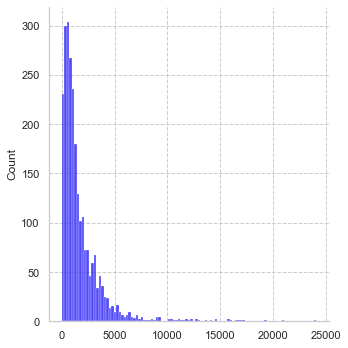

In [293]:
sns.displot(df_panel.sum_unemployed * df_panel.population)

In [178]:
df_panel["infections"] = df_panel["infections"].shift(1)

In [179]:
df_panel = df_panel.dropna()

In [180]:
df_panel

,region,week,sum_unemployed,population,infections,deaths,healed,Rt,procent_unemployed,procent_infections,...,procent_deaths,fin_blago,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp
1,Адыгея,2020-04-13,0.003347,463088.0,0.000091,4.318834e-06,0.000503,1.166667,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
2,Адыгея,2020-04-20,0.002663,463088.0,0.000600,4.318834e-06,0.000024,2.478261,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
3,Адыгея,2020-04-27,0.002144,463088.0,0.000173,2.159417e-06,0.000035,1.217391,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
4,Адыгея,2020-05-04,0.001106,463088.0,0.000091,0.000000e+00,0.000035,1.000000,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
5,Адыгея,2020-05-11,0.002138,463088.0,0.000045,4.318834e-06,0.000402,0.967033,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,Ярославская,2020-09-28,0.000630,1253389.0,0.000262,7.978369e-07,0.000248,1.046632,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2486,Ярославская,2020-10-05,0.000586,1253389.0,0.000275,0.000000e+00,0.000065,0.951220,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2487,Ярославская,2020-10-12,0.000540,1253389.0,0.000133,0.000000e+00,0.000645,1.004000,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2488,Ярославская,2020-10-19,0.000551,1253389.0,0.000487,1.595674e-06,0.000351,1.203488,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6


In [181]:
df_panel.to_csv("data/dataset_agregared.csv")

In [182]:
df_panel

,region,week,sum_unemployed,population,infections,deaths,healed,Rt,procent_unemployed,procent_infections,...,procent_deaths,fin_blago,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp
1,Адыгея,2020-04-13,0.003347,463088.0,0.000091,4.318834e-06,0.000503,1.166667,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
2,Адыгея,2020-04-20,0.002663,463088.0,0.000600,4.318834e-06,0.000024,2.478261,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
3,Адыгея,2020-04-27,0.002144,463088.0,0.000173,2.159417e-06,0.000035,1.217391,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
4,Адыгея,2020-05-04,0.001106,463088.0,0.000091,0.000000e+00,0.000035,1.000000,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
5,Адыгея,2020-05-11,0.002138,463088.0,0.000045,4.318834e-06,0.000402,0.967033,0.038649,0.012585,...,0.000106,34.959291,54.132260,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,Ярославская,2020-09-28,0.000630,1253389.0,0.000262,7.978369e-07,0.000248,1.046632,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2486,Ярославская,2020-10-05,0.000586,1253389.0,0.000275,0.000000e+00,0.000065,0.951220,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2487,Ярославская,2020-10-12,0.000540,1253389.0,0.000133,0.000000e+00,0.000645,1.004000,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6
2488,Ярославская,2020-10-19,0.000551,1253389.0,0.000487,1.595674e-06,0.000351,1.203488,0.031680,0.009193,...,0.000053,51.636007,175.948568,6.201432,1.505752,10.3,1.0,50.31,4.5,67.6


### проверим коллениарность данных

In [183]:
columns_for_x = ['infections', "Rt", 'population',
 'deaths', 'healed', 'procent_infections','procent_deaths',
 'depo_mean','depo_salary','income_fix','poverty_proc',
 'social_exp','growth_social_exp']
columns_for_x = ['infections', "Rt",
 'deaths', 'healed',]

name_y = "sum_unemployed"

### проверить Коэффициенты Вариации (VIF)

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

tmp = df_panel[columns_for_x] # .drop(["week", "region"], axis=1)

# X - матрица признаков
vif_data = pd.DataFrame()
vif_data["Variable"] = tmp.columns
vif_data["VIF"] = [variance_inflation_factor(tmp.values, i) for i in range(tmp.shape[1])]

In [185]:
vif_data

,Variable,VIF
0,infections,2.000567
1,Rt,1.447009
2,deaths,1.971058
3,healed,2.501864


<AxesSubplot:>

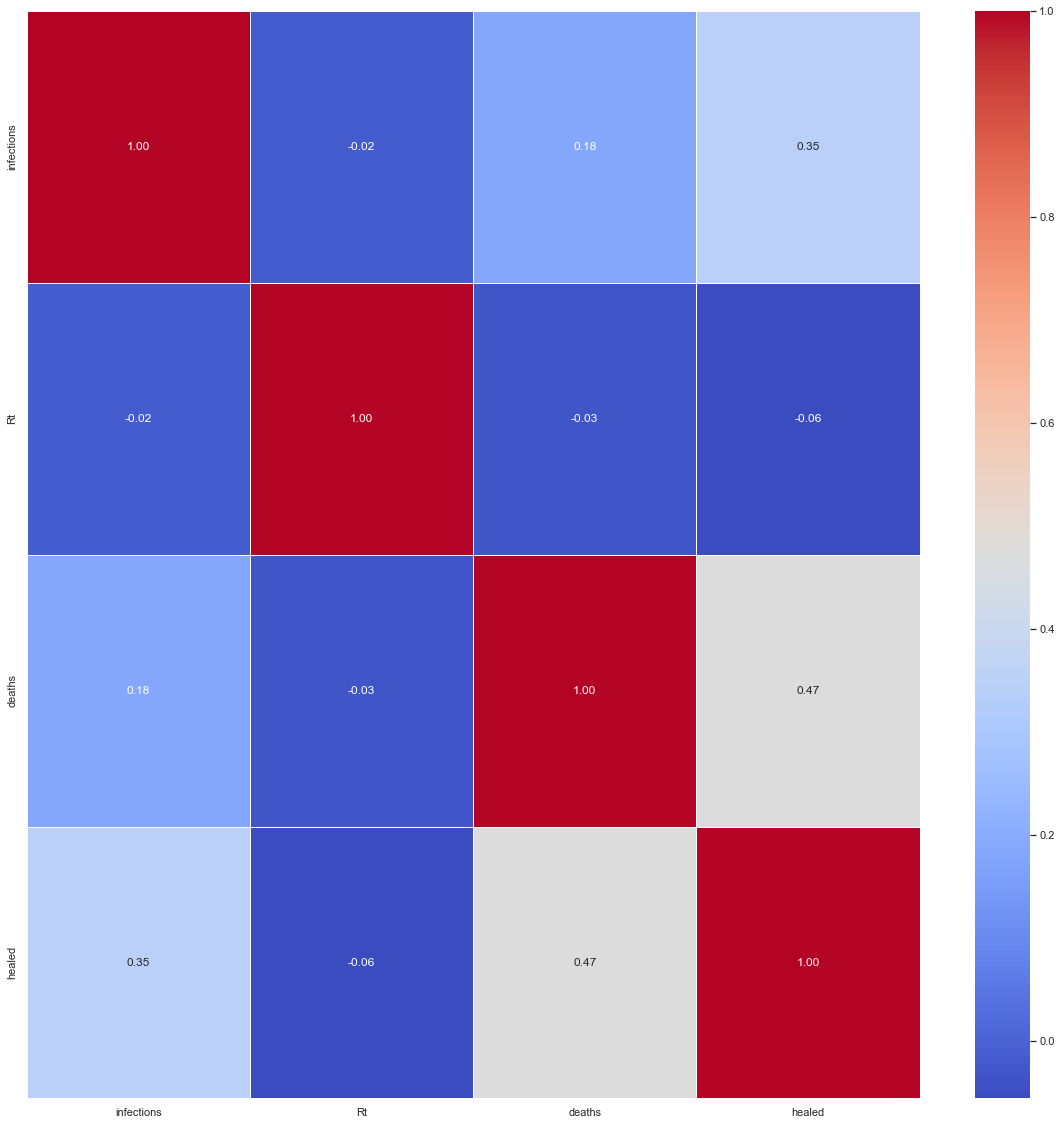

In [186]:
plt.figure(figsize=(20, 20))
corr =df_panel[columns_for_x].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

In [187]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# X - матрица признаков
X = df_panel.drop([columns_for_x], axis=1)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data

KeyError: "[('infections', 'Rt', 'deaths', 'healed')] not found in axis"

In [188]:
tmp = df_panel.reset_index()
tmp['week'] = pd.Categorical(tmp['week'])
tmp['region'] = pd.Categorical(tmp['region'])

In [189]:
tmp.head()

,index,region,week,sum_unemployed,population,infections,deaths,healed,Rt,procent_unemployed,...,procent_deaths,fin_blago,depo_mean,depo_salary,income_fix,poverty_proc,ex_poverty_proc,social_exp,growth_social_exp,soc_in_total_exp
0,1,Адыгея,2020-04-13,0.003347,463088.0,0.000091,0.000004,0.000503,1.166667,0.038649,...,0.000106,34.959291,54.13226,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
1,2,Адыгея,2020-04-20,0.002663,463088.0,0.000600,0.000004,0.000024,2.478261,0.038649,...,0.000106,34.959291,54.13226,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
2,3,Адыгея,2020-04-27,0.002144,463088.0,0.000173,0.000002,0.000035,1.217391,0.038649,...,0.000106,34.959291,54.13226,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
3,4,Адыгея,2020-05-04,0.001106,463088.0,0.000091,0.000000,0.000035,1.000000,0.038649,...,0.000106,34.959291,54.13226,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6
4,5,Адыгея,2020-05-11,0.002138,463088.0,0.000045,0.000004,0.000402,0.967033,0.038649,...,0.000106,34.959291,54.13226,1.836252,1.541341,12.5,1.9,46.72,16.3,62.6


In [190]:
formula = f'{name_y} ~ ' + ' + '.join(columns_for_x) + ' + C(region) + C(week)'
# formula = f'{name_y} ~ ' + ' + '.join(columns_for_x) + ' + C(region)'
import statsmodels.api as sm

model = sm.OLS.from_formula(formula, data=tmp)
results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 5})

In [191]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         sum_unemployed   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     20.39
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.99e-273
Time:                        15:34:36   Log-Likelihood:                 14860.
No. Observations:                2489   AIC:                        -2.949e+04
Df Residuals:                    2373   BIC:                        -2.881e+04
Df Model:                         115                                         
Covariance Type:                  HAC                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

## тест  Бройша-Пагана

In [192]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [193]:
_, p_value, _, _ = het_breuschpagan(results.resid, results.model.exog)
print('P-value:', p_value)

# нулева ягипотеза отвергается -> в данных гетероскедастичность

P-value: 7.704547240710844e-106


In [ ]:
# F-тест для модели с фиксированными эффектами (что модель адекватна)

## тест хаусмана

In [194]:
from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects
from linearmodels.panel import PanelOLS


In [195]:
data_for_hausman = tmp[columns_for_x + ["region", "week", "procent_unemployed"]]

In [ ]:
dependent_variable = "procent_unemployed"

In [239]:

tmp = tmp.reset_index()

In [250]:
tmp["week"] = pd.to_datetime(tmp["week"]).view('int64')

NotImplementedError: int64

In [260]:
fe_model = PanelOLS(tmp.procent_unemployed, tmp[columns_for_x], entity_effects=True)

ValueError: Series can only be used with a 2-level MultiIndex

In [230]:
tmp = tmp.set_index(["region", "week"])
# tmp = tmp.set_index('week')

In [231]:
mod = PanelOLS(tmp.procent_unemployed, tmp[columns_for_x], time_effects=True, entity_effects=True)

ValueError: The index on the time dimension must be either numeric or date-like

In [211]:
model = PanelOLS.from_formula('procent_unemployed ~ 1 + infections + Rt + deaths + healed + TimeEffects', data=tmp).fit()

ValueError: The index on the time dimension must be either numeric or date-like

In [ ]:
from linearmodels.panel import PooledOLS

model = PooledOLS(tmp.procent_unemployed, exog)

In [ ]:
tmp.set_index(['region', 'week'])

In [ ]:


# Предполагается, что вы уже оценили модели FE и RE
fe_model = PanelOLS(dependent_variable, exog_vars, entity_effects=True)
re_model = RandomEffects(dependent_variable, exog_vars)

# Производим тест Хаусмана
hausman_test = fe_model.hausman_test(re_model)
print(hausman_test)

## проверить на адекватность фиксированных эффектов

In [ ]:
formula

In [ ]:
import statsmodels.api as sm


model_with_fe = sm.OLS.from_formula(formula, data=tmp)
results_with_fe = model_with_fe.fit(cov_type='HAC', cov_kwds={'maxlags': 5})

In [ ]:
print(results_with_fe.summary())

## отбросим часть данных

In [ ]:
tmp = df_panel.copy()

In [ ]:
tmp = tmp.sort_values(by="week")

In [ ]:
tmp.groupby("week").agg({"sum_unemployed": "sum"}).plot()

In [ ]:
tmp2 = tmp[tmp.week > pd.to_datetime("05.01.2020")]

In [ ]:
tmp2.groupby("week").agg({"sum_unemployed": "sum"}).plot()

In [ ]:
import statsmodels.api as sm

model_with_fe = sm.OLS.from_formula(formula, data=tmp2)
results_with_fe = model_with_fe.fit(cov_type='HAC', cov_kwds={'maxlags': 5})

In [ ]:
print(results_with_fe.summary())

In [ ]:
df.depo_mean

## таблица с коэффициентами

In [ ]:
columns_for_x

In [ ]:
all_results = []

for i in range(len(columns_for_x)):
    print(".", columns_for_x[:i+1], end="")
    formula = f'{name_y} ~ ' + ' + '.join(columns_for_x[:i+1]) + ' + C(region) + C(week)'
    # formula = f'{name_y} ~ ' + ' + '.join(columns_for_x) + ' + C(region)'

    model = sm.OLS.from_formula(formula, data=tmp)
    results = model.fit(cov_type='HAC', cov_kwds={'maxlags': 5})

    all_results.append(results)

In [ ]:
from statsmodels.iolib.summary2 import summary_col

results_table = summary_col(all_results, model_names=[f'Model {i}' for i in range(len(all_results))], stars=True)

In [ ]:
print(results_table)

In [ ]:
print(results_table)

In [ ]:
table_coefs = results_table.tables[0].iloc[221:]

In [ ]:
table_coefs

In [ ]:
indexes = ["R-squared", "R-squared Adj."] + columns_for_x
table_coefs = table_coefs.loc[indexes]

In [ ]:
table_coefs

In [ ]:
table_coefs.to_csv("data/table_coefs_model_1.csv")

In [ ]:
model_without_fe = sm.OLS.from_formula(f'{name_y} ~ ' + ' + '.join(columns_for_x), data=tmp)
results_without_fe = model_without_fe.fit(cov_type='HAC', cov_kwds={'maxlags': 5})

In [ ]:
print(results_without_fe.summary())

## дальше мрак

In [ ]:
# panel_data['id'] = pd.Categorical(panel_data['id'])
# panel_data['time'] = pd.Categorical(panel_data['time'])
#
# # Оценка модели с фиксированными эффектами
# model = sm.PanelOLS.from_formula('y ~ x1 + x2 + EntityEffects + TimeEffects', data=panel_data)
# results = model.fit()

In [ ]:

dependent_variable = 'sum_unemployed'


explanatory_variables = ['sum_infections', "yandex_metric", "rt_coef"] + ['depo_mean_19',
 'depo_salary_19',
 'growth_depo_19',
 'curr_depo_perc_19',
 'fin_wealth_19',
 'soceco_wealth_19',
 'depo_mean_20',
 'depo_salary_20',
 'depo_mean_21',
 'depo_salary_21']

individual_variable = 'region'
time_variable = 'week'

# Модель с фиксированными эффектами
model_fe = PanelOLS.from_formula(f'{dependent_variable} ~ {"+".join(explanatory_variables)} + EntityEffects', df_panel)


# Оцените обе модели
results_fe = model_fe.fit(cov_type='kernel', kernel='bartlett', check_rank=False)

# Модель со случайными эффектами
# model_re = RandomEffects.from_formula(f'{dependent_variable} ~ {"+".join(explanatory_variables)}', df_panel)
# results_re = model_re.fit()



In [ ]:
print(results_fe)

In [ ]:
from statsmodels.datasets import grunfeld

data = grunfeld.load_pandas().data
data = data.set_index(["firm", "year"])
data.head()

In [ ]:
from linearmodels import PanelOLS

mod = PanelOLS.from_formula("invest ~ value + capital + EntityEffects", data=data)
print(mod.fit())

In [ ]:
f'{dependent_variable} ~ {"+".join(explanatory_variables)} + EntityEffects'